# Plot timing results

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


## Load results

In [24]:
datadims = np.array([10, 20, 50, 100, 200, 500, 1000])

experiments = [
    "flow_4_affine-coupling_resnet_3_256",
    "pie_4_affine-coupling_resnet_3_256",
    "mf_4_affine-coupling_resnet_3_256",
    "mf_1_affine-coupling_resnet_3_100",
    "mf_4_affine-coupling_mlp_3_256",
    "mf_1_affine-coupling_mlp_3_100",
]

labels = [
    "Standard flow",
    "PIE",
    "Manifold flow", 
    "    (small)", 
    "    (MLP)", 
    "    (small, MLP)", 
]

In [25]:
def load_times(experiment):
    try:
        times = np.load("../data/timing/{}.npy".format(experiment))
        return np.mean(times, axis=1), np.std(times, axis=1)
    except FileNotFoundError:
        print("Did not find results for experiment {}".format(experiment))
        return np.nan*np.ones(len(datadims)), np.nan*np.ones(len(datadims))

In [26]:
mean_times, std_times = [], []

for exp in experiments:
    means, stds = load_times(exp)
    mean_times.append(means)
    std_times.append(stds)

Did not find results for experiment mf_4_affine-coupling_resnet_3_256
Did not find results for experiment mf_1_affine-coupling_resnet_3_100
Did not find results for experiment mf_4_affine-coupling_mlp_3_256
Did not find results for experiment mf_1_affine-coupling_mlp_3_100


## Plot

In [27]:
colors = ["C0", "C1", "C2", "C2", "C2", "C2"]
linestyles = ["-", "-", "-", "--", ":", "-."]

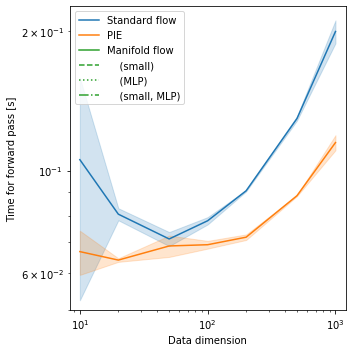

In [34]:
plt.figure(figsize=(5,5))
ax = plt.gca()

for means, stds, label, c, ls in zip(mean_times, std_times, labels, colors, linestyles):
    plt.fill_between(datadims, means - stds, means + stds, color=c, alpha=0.2)
    plt.plot(datadims, means, c=c, ls=ls, label=label)

plt.legend()
plt.xlabel("Data dimension")
plt.ylabel("Time for forward pass [s]")
plt.xscale("log")
plt.yscale("log")
plt.xlim(10./1.2,1200.)
plt.ylim(5.e-2, None)

plt.tight_layout()
plt.savefig("../figures/timing.pdf")
